## Introduction
This document holds tutorials/code demos for easy implementation of more advanced features, such as animation, ..., ??? 

## Animation
The animation of plots via the matplotlib library is explored here.

### How to animate

The general idea to execute an animation is as follows:
* Initialize all plots, and name the ones that will vary during the animation.
* Create an animation function that contains the operations needed to get the i-th frame of the animation.
    * From the named plots, call a set_data function to specify the data to be plotted in the i-th frame of the animation.
* Use the FuncAnimation function to create the animation (matplotlib.animation)
* Save the animation to desired format (animation.save())

### What to animate
Matplotlib is meant for single plots, thus transition between different plots is not feasible using matplotlib library. Animating a graph is tied to the idea of change with respect to time, yet some graphs need not be animated as a static plot conveys the same information.

As a general principle, animate if:
* It makes sense for the system to be expressed in the form x(t) and y(t) (and z(t)).
    * Example: Simulations of physical systems, observing how they evolve over time 

Animation may not be helpful if:
* y or x is t, then a line or scatter plot conveys the same idea
* Presenting summary statistic, where the time evolution does not matter
* x and y are linked by constraints that are independent of time.

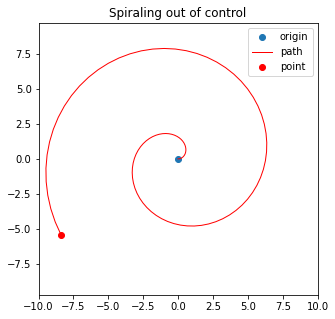

In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter

# Data
t = np.linspace(0, 10, num=100)
x = t*np.cos(t)
y = t*np.sin(t)

# Initialize
fig, ax = plt.subplots(figsize=(5,5))

# Example of static plot -- won't change throughout animation, thus no need to save name.
ax.scatter([0], [0], label='origin')

# The main plot will change throughout animation, so create a container for it
line1, = ax.plot([], [], '-r', label='path', lw=1)
point1, = ax.plot([], [], 'or', label='point')

# Customize
ax.legend(loc='upper right')
ax.set_title('Spiraling out of control')

ax.axis('equal')
ax.set(xlim=(-10,10),ylim=(-10,10))

# Animate Frame
def animate_frame(i):
    '''
    Defines what the i-th frame of animation should have.

    Parameters
    ----------
    i: Specifies the frame of animation

    Returns
    -------
    List of plot elements that need to be updated
    '''
    # Line from 0 to i-th (inclusive) data point, and a point for the i-th data point
    line1.set_data(x[:i+1],y[:i+1])
    point1.set_data(x[i],y[i])

    return line1,point1

# Show

# blit=True optimizes the graphing process by only redrawing the changes.
# It does so using the return values of animate.
# Therefore, animate_frame returns the list of objects need updating.
ani = FuncAnimation(fig,animate_frame,blit=True,frames=len(t))

# In particular, gifs outputs are not rendered for .ipynb, so saving and redirecting to output should be used instead.
# Uncomment this to actually save stuff.
# ani.save("bin\\animation_example.gif",writer=PillowWriter(fps=30),dpi=200) 